In [293]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Q2: Eigenface with PCA

## a.) Load dataset and plot the first 5 faces

In [312]:
mat = scipy.io.loadmat('data.mat')
X = mat['X']
Y = mat['Y'].ravel()
train_id = mat['trainimages'].ravel()-1
test_id = mat['testimages'].ravel()-1
print(X.shape)

(45045, 165)


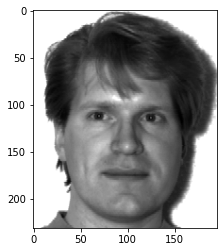

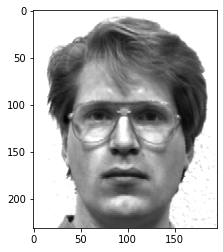

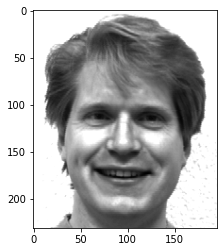

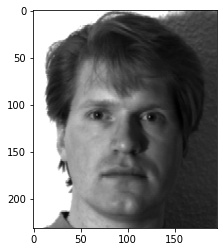

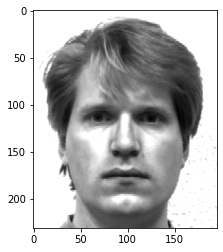

In [313]:
sample_face = np.transpose(X[:, 0:5].reshape(195,231,5))
for i in range(5):
    plt.figure()
    plt.imshow(sample_face[i, :, :], cmap="gray")

## b.) Dimensional reduction to preserve 90% of the variance 

In [315]:
from sklearn.decomposition import PCA
# Data is passed in as n_features x n_samples, but sklearn PCA needs n_samples x n_features, so transpose X
pca = PCA(.9)
compressed_X = pca.fit_transform(X.T)

# Quick sanity check to see if 38 components captures 90% variance
pca1 = PCA(n_components=38).fit(X.T)
print(np.sum(pca1.explained_variance_ratio_))

# Eigenface defintion
u = (X - np.mean(X, axis=0)) @ compressed_X

0.9004144295625076


### Number of eigenvectors

In [296]:
print("New number of feature dimension is {}.".format(pca.n_components_))

New number of feature dimension is 38.


### Plot the first 5 eigenfaces

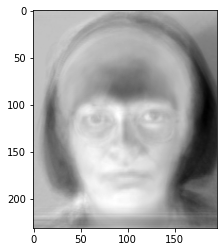

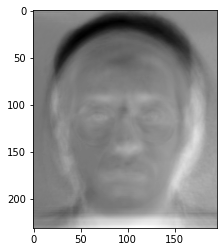

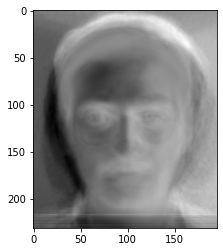

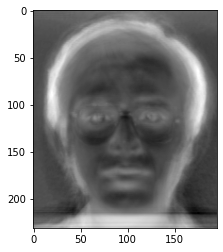

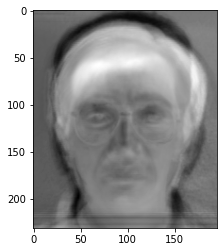

In [297]:
eigenfaces = np.transpose(u[:, 0:5].reshape(195, 231, 5))
for i in range(5):
    plt.figure()
    plt.imshow(eigenfaces[i, :, :], cmap="gray")

### Bar plot variance preserved in each principle components

[0.17061649 0.15477326 0.11013432 0.06354261 0.06141484 0.0481875
 0.03331124 0.02809504 0.02639302 0.02379812 0.01709908 0.01454142
 0.01411703 0.01143241 0.01108751 0.00968342 0.00885608 0.00816275
 0.00755732 0.00697576 0.00642891 0.00572675 0.00558187 0.00507357
 0.00489485 0.00441013 0.00412782 0.00402231 0.00376886 0.00347413
 0.0032588  0.00317372 0.00307058 0.00302325 0.00292907 0.00265777
 0.00262715 0.00258159]


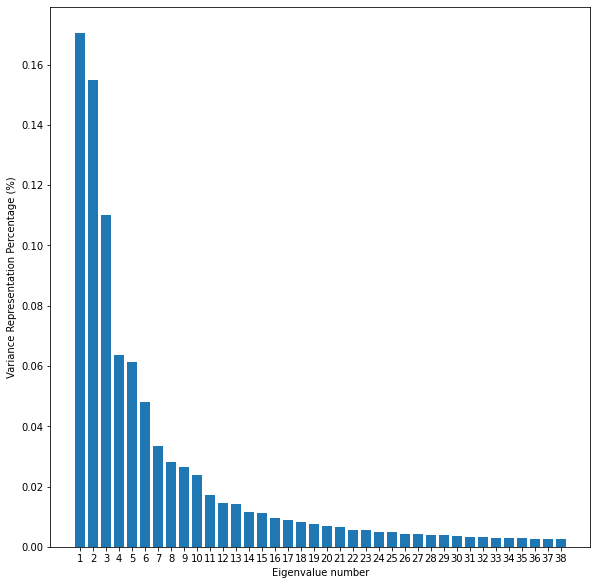

In [298]:
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0, 0, 1, 1])
percentage = pca.explained_variance_ratio_
evalues = [str(i) for i in range(1, len(percentage)+1)]
print(percentage)
ax.bar(evalues, percentage)
plt.xlabel("Eigenvalue number")
plt.ylabel("Variance Representation Percentage (%)")
plt.show()

## c.) Reconstruction of 1st training example with varying number of eigenfaces

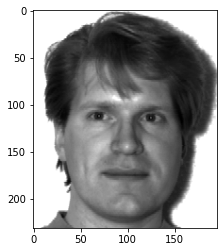

In [299]:
first_face = np.transpose(X[:, 0].reshape(195,231))
plt.figure()
plt.imshow(first_face, cmap="gray")
plt.show()

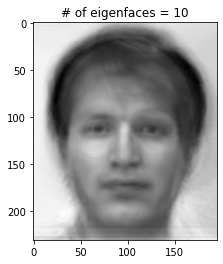

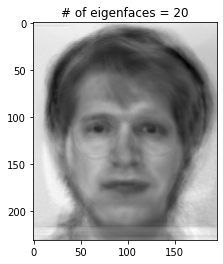

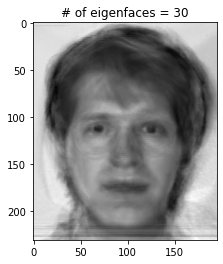

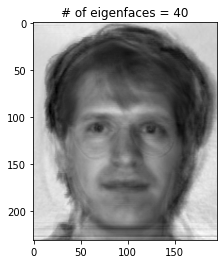

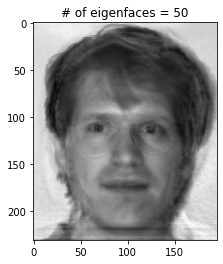

In [300]:
evals = [10, 20, 30, 40, 50]
for i in evals:
    pca = PCA(n_components=i)
    compressed_X = pca.fit_transform(X)
    approximation = pca.inverse_transform(compressed_X)
    plt.figure()
    plt.title("# of eigenfaces = " + str(i))
    plt.imshow(np.transpose(approximation[:, 0]).reshape(195, 231).T, cmap="gray")
    plt.show()

## d.) KNN Classifier on testing images in 30D and original dimension

In [301]:
from sklearn.neighbors import KNeighborsClassifier

In [302]:
pca = PCA(n_components=30)
train_X = pca.inverse_transform(pca.fit_transform(X[:, train_id].T))
test_X = pca.inverse_transform(pca.fit_transform(X[:, test_id].T))
knn_30D_score = KNeighborsClassifier(n_neighbors=1).fit(train_X, Y[train_id]).score(test_X, Y[test_id])
knn_45kD_score = KNeighborsClassifier(n_neighbors=1).fit(X[:, train_id].T, Y[train_id]).score(X[:, test_id].T, Y[test_id])

In [305]:
print("KNN Accuracy in 30D face space = " + "%.2f" % (knn_30D_score * 100) + "%")
print("KNN Accuracy in original space = " + "%.2f" % (knn_45kD_score * 100) + "%")

KNN Accuracy in 30D face space = 80.00%
KNN Accuracy in original space = 83.33%


It makes sense that the accuracy of a compressed model would be less because it doesn't capture the resolution of the original one (30 features vs. 45k features). The fact that the percentages are marginally close to each other tells us that PCA is working because it should more of less return the same percentage since we did capture 90% of the original data's variance.